In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


In [6]:
data = pd.read_csv('./data/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
data.columns
data[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']]

,sex,cp,fbs,restecg,exang,slope,thal
0,1,3,1,0,0,0,1
1,1,2,0,1,0,0,2
2,0,1,0,0,0,2,2
3,1,1,0,1,0,2,2
4,0,0,0,1,1,2,2
...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,3
299,1,3,0,1,0,1,3
300,1,0,1,1,0,1,3
301,1,0,0,1,1,1,3


- age：年龄
- sex：性别(1 = 男性, 0 = 女性)
- cp：胸部疼痛类型(值1：典型心绞痛，值2：非典型性心绞痛，值3：非心绞痛，值4：无症状）
- trestbps：血压
- chol：胆固醇
- fbs：空腹血糖（> 120 mg/dl，1=真；0=假）
- restecg：心电图结果（0=正常，1=患有ST-T波异常，2=根据Estes的标准显示可能或确定的左心室肥大）
- thalach：最大心跳数
- exang：运动时是否心绞痛（1=有过；0=没有）
- oldpeak：运动相对于休息的ST
- slope：心电图ST segment的倾斜度(值1:上坡，值2:平坦，值3:下坡）
- ca：透视检查看到的血管数
- thal：缺陷种类（3=正常；6=固定缺陷；7=可逆缺陷）
- target：是否患病（0=否，1=是）

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


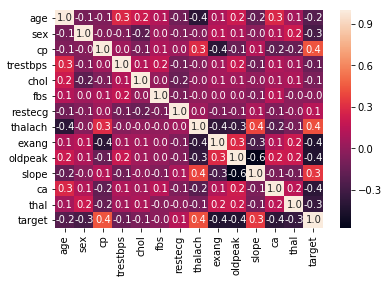

In [9]:
sns.heatmap(data.corr(), annot=True, fmt='.1f')
data.corr().style.background_gradient(cmap='coolwarm')

([<matplotlib.patches.Wedge at 0x1a20791208>,
 [Text(-0.1604426989002982, 1.1387528881937419, 'Sick'),
  Text(0.16044280551803777, -1.1387528731720071, 'Not Sick')],
 [Text(-0.07673346469144694, 0.5446209465274416, '54.5%'),
  Text(0.0767335156825398, -0.5446209393431338, '45.5%')])

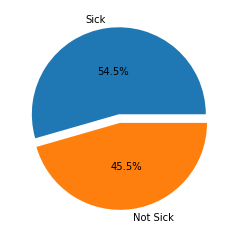

In [10]:
plt.pie(x=data['target'].value_counts(), autopct='%.1f%%', 
        explode=[0.05] * 2, labels=['Sick', 'Not Sick'], pctdistance=0.5)

In [11]:
data = pd.get_dummies(data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'])

In [105]:
x_data = data.drop(columns=['target'])
y_data = data['target']

scaler = StandardScaler()
x_data = scaler.fit_transform(x_data)

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=2021)

/Users/zhanghaibin/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/zhanghaibin/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [107]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('train score', clf.score(X_train, y_train))
print('test score', clf.score(X_test, y_test))

train score 0.8490566037735849
test score 0.8241758241758241


/Users/zhanghaibin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        37
           1       0.85      0.85      0.85        54

   micro avg       0.82      0.82      0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91

